In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE

In [46]:
emb_df = pd.read_csv("a40_emb.csv")
emb_df

,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb26,emb27,emb28,emb29,emb30,emb31,label,file_n,sample_n,file_name
0,0.204718,1.551140,0.255790,0.947352,1.834220,0.781867,1.306349,0.402482,0.921216,1.357965,...,0.993434,0.227034,0.666606,0.841333,1.387245,1.016979,"uterus,_post-menopause_-_glandular_cells_2",0,2244,"uterus,_post-menopause_-_glandular_cells_2_500..."
1,0.097070,0.700773,-0.022598,0.583479,1.590787,0.924720,0.644648,0.314229,1.070615,1.190165,...,1.013461,0.668266,0.798341,0.983780,0.987244,0.674389,"uterus,_post-menopause_-_glandular_cells_2",0,2882,"uterus,_post-menopause_-_glandular_cells_2_500..."
2,1.762301,1.337624,1.547940,0.959460,2.261390,1.569506,2.628018,1.558543,0.098902,2.344872,...,0.663279,0.872518,1.531948,0.620851,1.111873,-0.087470,"uterus,_post-menopause_-_glandular_cells_2",0,3235,"uterus,_post-menopause_-_glandular_cells_2_500..."
3,3.398169,1.427081,2.279220,0.867394,2.679292,1.635215,3.707913,1.998042,0.017912,3.693328,...,0.602350,0.881781,0.588010,0.489206,1.618207,0.107390,"uterus,_post-menopause_-_glandular_cells_2",0,302,"uterus,_post-menopause_-_glandular_cells_2_500..."
4,2.680020,0.991216,1.682690,0.714942,1.770652,1.455808,2.161244,1.437115,0.509165,2.472505,...,1.021341,1.126955,0.751897,0.982071,1.365774,0.281260,"uterus,_post-menopause_-_glandular_cells_2",0,1921,"uterus,_post-menopause_-_glandular_cells_2_500..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,0.535482,1.123092,0.059615,0.600665,0.794472,0.767941,1.084317,0.775972,1.210223,0.595859,...,0.867348,1.185536,1.038007,1.050028,0.823688,0.984637,"stomach,_lower_-_glandular_cells_2",159,4852,"stomach,_lower_-_glandular_cells_2_5000(0)"
8156,0.505662,1.068636,0.745835,0.849567,0.149967,0.559737,0.819290,0.822562,1.220165,-0.357181,...,0.389259,1.303224,0.819721,1.335131,1.467890,1.615238,"stomach,_lower_-_glandular_cells_2",159,3755,"stomach,_lower_-_glandular_cells_2_5000(0)"
8157,0.671097,1.923657,0.588037,1.219592,0.276376,0.515091,0.982741,0.791816,1.535853,-0.216437,...,1.097836,1.149184,0.624576,2.296941,1.500099,2.095527,"stomach,_lower_-_glandular_cells_2",159,1432,"stomach,_lower_-_glandular_cells_2_5000(0)"
8158,1.124743,1.164891,0.819806,0.892291,0.820704,0.892883,1.243066,0.990007,0.997282,0.730420,...,1.342936,0.782991,0.681156,1.689899,0.872703,1.673708,"stomach,_lower_-_glandular_cells_2",159,39,"stomach,_lower_-_glandular_cells_2_5000(0)"


In [20]:
emb_means_df = emb_df.drop(columns=["file_n", "sample_n"]).groupby("label").mean(numeric_only=True)
emb_means_df.columns

Index(['emb0', 'emb1', 'emb2', 'emb3', 'emb4', 'emb5', 'emb6', 'emb7', 'emb8',
       'emb9', 'emb10', 'emb11', 'emb12', 'emb13', 'emb14', 'emb15', 'emb16',
       'emb17', 'emb18', 'emb19', 'emb20', 'emb21', 'emb22', 'emb23', 'emb24',
       'emb25', 'emb26', 'emb27', 'emb28', 'emb29', 'emb30', 'emb31'],
      dtype='object')

In [21]:
emb_means = emb_means_df.values
emb_means.shape

(40, 32)

In [22]:
emb_values = emb_df.drop(columns=[c for c in emb_df.columns if "emb" not in c]).values
emb_values.shape

(8160, 32)

In [43]:
tsne = TSNE().fit_transform(emb_values)

/tmp/ipykernel_990/2215626863.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  emb_df.label_n = emb_df["label_n"] = emb_df["label"].map(cell_tyes.index)


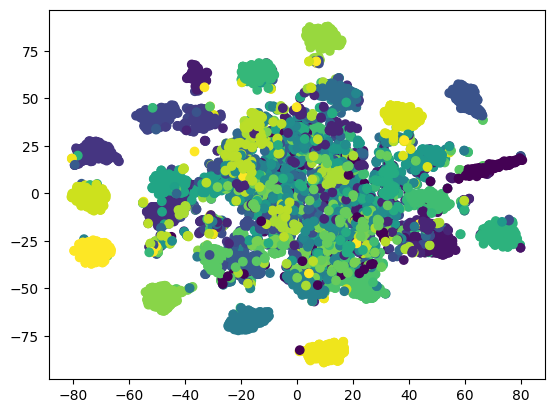

In [47]:
cell_tyes = list(emb_df["label"].unique())
emb_df.label_n = emb_df["label_n"] = emb_df["label"].map(cell_tyes.index)

plt.scatter(tsne[:,0], tsne[:,1], c=emb_df["label_n"])

In [41]:
emb_means_df.index[9]

'fallopian_tube_-_glandular_cells_2'

In [39]:
mean_diff = emb_values[:,None,:] - emb_means[None,:,:]
np.argmin(np.sum(np.power(mean_diff, 2.0), axis=2), axis=1)

array([ 9,  9, 36, ..., 30, 25, 30])

TypeError: matmul: axis can only be used with a single shared core dimension, not with the 3 distinct ones implied by signature (n?,k),(k,m?)->(n?,m?).

In [28]:
mean_sdistances = emb_values @ emb_means.T
closest_mean = np.argmin(mean_sdistances, axis=1)
closest_mean.shape

array([ 8, 19, 22, ..., 24, 24, 19])